In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization
from sklearn.preprocessing import StandardScaler

# Configure plots
sns.set(style="whitegrid")


In [ ]:
# Load rainfall data and aggregate yearly
rainfall = pd.read_csv(
    '/content/climate_agriculture_proj/daily_final_ultimate_rainfall befoerr.csv',
    usecols=['Date', 'Rainfall']
)
rainfall['Year'] = pd.to_datetime(rainfall['Date'], format='%d-%m-%Y').dt.year
yearly_rainfall = rainfall.groupby('Year')['Rainfall'].sum().reset_index()

# Fill missing values in yearly rainfall (if any)
yearly_rainfall['Rainfall'].fillna(yearly_rainfall['Rainfall'].median(), inplace=True)

/tmp/ipython-input-2099382686.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  yearly_rainfall['Rainfall'].fillna(yearly_rainfall['Rainfall'].median(), inplace=True)


In [ ]:
# Load irrigated area and fix column names
irrigated_area = pd.read_csv(
    '/content/climate_agriculture_proj/irrigated_area.txt',
    delim_whitespace=True
)
irrigated_area.rename(columns={'snames': 'State', 'year': 'Year', 'tnia': 'tnia_irrigated', 'tgia': 'tgia_irrigated'}, inplace=True)
irrigated_area = irrigated_area[['State', 'Year', 'tnia_irrigated', 'tgia_irrigated']]
# Fill missing for irrigation data
irrigated_area['tnia_irrigated'].fillna(irrigated_area['tnia_irrigated'].median(), inplace=True)
irrigated_area['tgia_irrigated'].fillna(irrigated_area['tgia_irrigated'].median(), inplace=True)

# Load irrigation water volume and fix column names
irrigation_water = pd.read_csv(
    '/content/climate_agriculture_proj/irrigation_water_volume.txt',
    delim_whitespace=True
)
irrigation_water.rename(columns={'snames': 'State', 'year': 'Year', 'tnia': 'tnia_water', 'tgia': 'tgia_water'}, inplace=True)
irrigation_water = irrigation_water[['State', 'Year', 'tnia_water', 'tgia_water']]
# Fill missing irrigation water data
irrigation_water['tnia_water'].fillna(irrigation_water['tnia_water'].median(), inplace=True)
irrigation_water['tgia_water'].fillna(irrigation_water['tgia_water'].median(), inplace=True)

/tmp/ipython-input-408361437.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  irrigated_area = pd.read_csv(
/tmp/ipython-input-408361437.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  irrigated_area['tnia_irrigated'].fillna(irrigated_area['tnia_irrigated'].median(), inplace=True)
/tmp/ipython-input-408361437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment usin

In [ ]:
# Load crop yield and fill missing
crop_yield = pd.read_csv('/content/climate_agriculture_proj/crop_yield.csv')
crop_yield.rename(columns={'Crop_Year': 'Year'}, inplace=True)
crop_yield = crop_yield[['State', 'Year', 'Crop', 'Yield']]
crop_yield['Yield'].fillna(crop_yield['Yield'].median(), inplace=True)
crop_yield['Crop'].fillna(crop_yield['Crop'].mode()[0], inplace=True)

/tmp/ipython-input-1079961376.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crop_yield['Yield'].fillna(crop_yield['Yield'].median(), inplace=True)
/tmp/ipython-input-1079961376.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
# Load market price, fill missing
market_price = pd.read_csv('/content/climate_agriculture_proj/market price dataset.csv')
market_price = market_price[['State', 'District', 'Commodity', 'Modal_x0020_Price']]
market_price.rename(columns={'Modal_x0020_Price': 'Market_Price'}, inplace=True)
market_price['Market_Price'].fillna(market_price['Market_Price'].median(), inplace=True)
market_price['Commodity'].fillna(market_price['Commodity'].mode()[0], inplace=True)
market_price['District'].fillna(market_price['District'].mode()[0], inplace=True)


/tmp/ipython-input-703610217.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  market_price['Market_Price'].fillna(market_price['Market_Price'].median(), inplace=True)
/tmp/ipython-input-703610217.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
# Merge datasets
merged = yearly_rainfall.merge(irrigated_area, on='Year', how='left')
merged = merged.merge(irrigation_water, on=['State', 'Year'], how='left')
merged = merged.merge(crop_yield, on=['State', 'Year'], how='left')
merged = merged.merge(market_price, on=['State'], how='left')


In [ ]:
# After merging fill any remaining missing values
num_cols = merged.select_dtypes(include=np.number).columns
for col in num_cols:
    merged[col].fillna(merged[col].median(), inplace=True)
cat_cols = merged.select_dtypes(include='object').columns
for col in cat_cols:
    merged[col].fillna(merged[col].mode()[0], inplace=True)

# Label rainfall type before scaling
def rainfall_label(x):
    if x < 750:
        return 'Drought'
    elif x > 2000:
        return 'Flood'
    else:
        return 'Normal'

merged['Rainfall_Type'] = merged['Rainfall'].apply(rainfall_label)

/tmp/ipython-input-2058879914.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(merged[col].median(), inplace=True)
/tmp/ipython-input-2058879914.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
def rainfall_label(x):
    if x < 750:
        return 'Drought'
    elif x > 2000:
        return 'Flood'
    else:
        return 'Normal'
merged['Rainfall_Type'] = merged['Rainfall'].apply(rainfall_label)

In [ ]:
# Save final cleaned dataset
merged.to_csv('/content/climate_agriculture_proj/merged_final.csv', index=False)
print("Final dataset saved as 'merged_final.csv'")

Final dataset saved as 'merged_final.csv'


In [ ]:

# Show info, stats, missing values
print("\nDataset Info:")
print(merged.info())
print("\nSummary Statistics:")
print(merged.describe())
print("\nMissing Values:")
print(merged.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615045 entries, 0 to 615044
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            615045 non-null  int32  
 1   Rainfall        615045 non-null  float64
 2   State           615045 non-null  object 
 3   tnia_irrigated  615045 non-null  float64
 4   tgia_irrigated  615045 non-null  float64
 5   tnia_water      615045 non-null  float64
 6   tgia_water      615045 non-null  float64
 7   Crop            615045 non-null  object 
 8   Yield           615045 non-null  float64
 9   District        615045 non-null  object 
 10  Commodity       615045 non-null  object 
 11  Market_Price    615045 non-null  float64
 12  Rainfall_Type   615045 non-null  object 
dtypes: float64(7), int32(1), object(5)
memory usage: 58.7+ MB
None

Summary Statistics:
                Year       Rainfall  tnia_irrigated  tgia_irrigated  \
count  615045.000000  61

In [ ]:
print(merged.head())

   Year     Rainfall           State  tnia_irrigated  tgia_irrigated  \
0  2015  1695.488761  Andhra Pradesh      160.445097      228.110124   
1  2015  1695.488761  Andhra Pradesh      160.445097      228.110124   
2  2015  1695.488761  Andhra Pradesh      160.445097      228.110124   
3  2015  1695.488761  Andhra Pradesh      160.445097      228.110124   
4  2015  1695.488761  Andhra Pradesh      160.445097      228.110124   

   tnia_water  tgia_water      Crop  Yield District            Commodity  \
0    8.400831   10.071327  Arecanut   3.32  Chittor        Cluster beans   
1    8.400831   10.071327  Arecanut   3.32  Chittor               Tomato   
2    8.400831   10.071327  Arecanut   3.32   Guntur             Turmeric   
3    8.400831   10.071327  Arecanut   3.32   Guntur         Dry Chillies   
4    8.400831   10.071327  Arecanut   3.32  Krishna  Paddy(Dhan)(Common)   

   Market_Price Rainfall_Type  
0        5000.0        Normal  
1        2800.0        Normal  
2        9050.

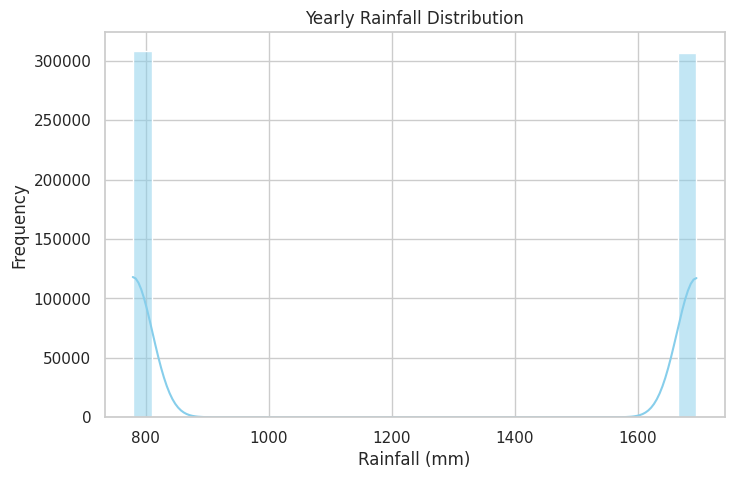

In [ ]:
# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(merged['Rainfall'], bins=30, color='skyblue', kde=True)
plt.title("Yearly Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1556021139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])
/tmp/ipython-input-1556021139.py:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])


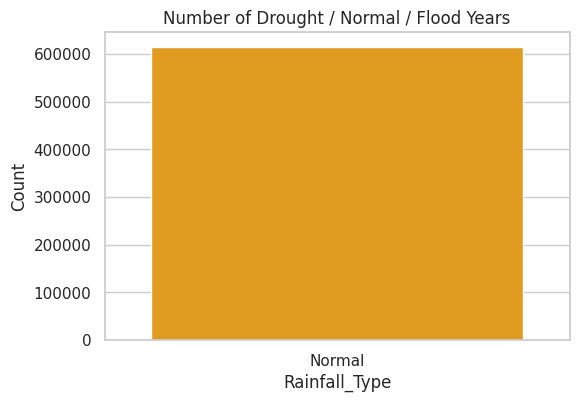

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])
plt.title("Number of Drought / Normal / Flood Years")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


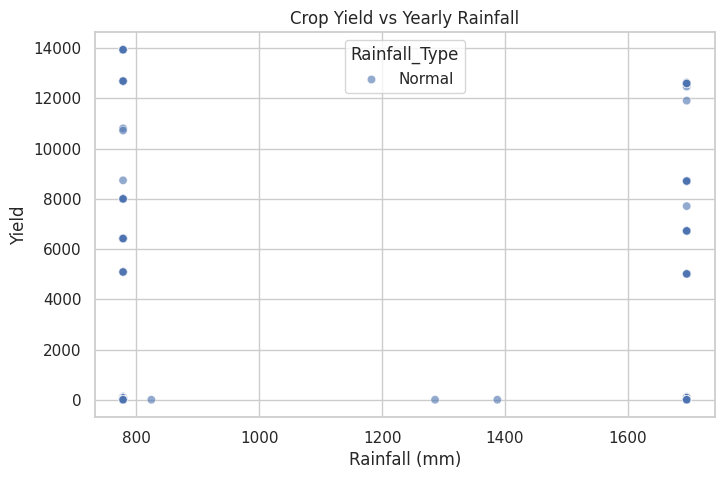

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rainfall', y='Yield', data=merged, hue='Rainfall_Type', alpha=0.6)
plt.title("Crop Yield vs Yearly Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield")
plt.show()

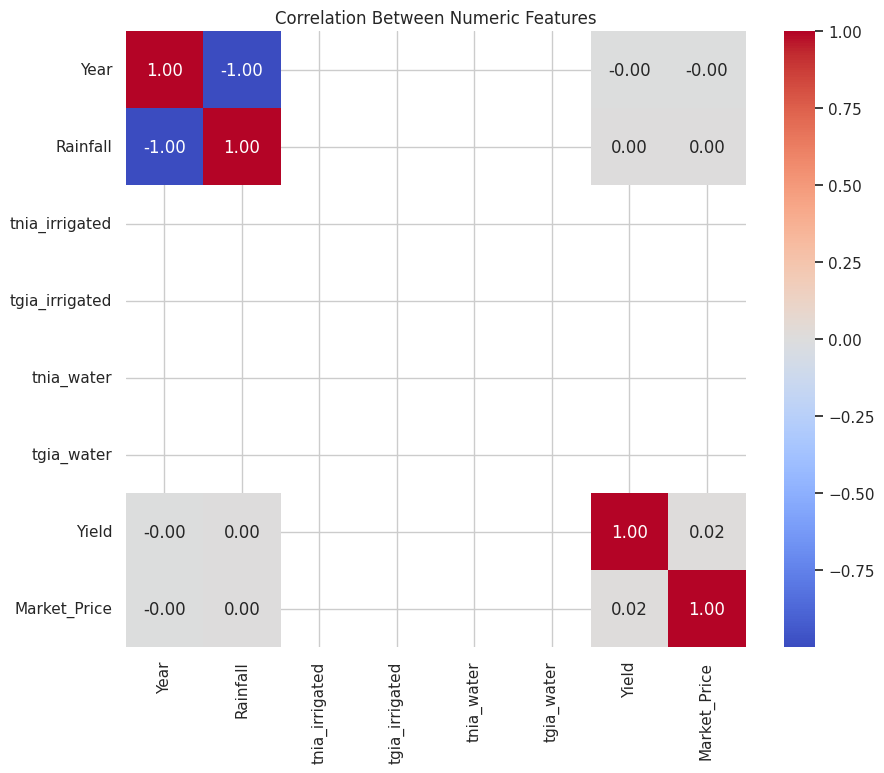

In [ ]:
# Select numeric columns only
numeric_cols = merged.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


In [ ]:
print("\nDataset Info:")
merged.info()

print("\nSummary Statistics:")
print(merged.describe())

print("\nMissing Values:")
print(merged.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615045 entries, 0 to 615044
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            615045 non-null  int32  
 1   Rainfall        615045 non-null  float64
 2   State           615045 non-null  object 
 3   tnia_irrigated  615045 non-null  float64
 4   tgia_irrigated  615045 non-null  float64
 5   tnia_water      615045 non-null  float64
 6   tgia_water      615045 non-null  float64
 7   Crop            615045 non-null  object 
 8   Yield           615045 non-null  float64
 9   District        615045 non-null  object 
 10  Commodity       615045 non-null  object 
 11  Market_Price    615045 non-null  float64
 12  Rainfall_Type   615045 non-null  object 
dtypes: float64(7), int32(1), object(5)
memory usage: 58.7+ MB

Summary Statistics:
                Year       Rainfall  tnia_irrigated  tgia_irrigated  \
count  615045.000000  615045.

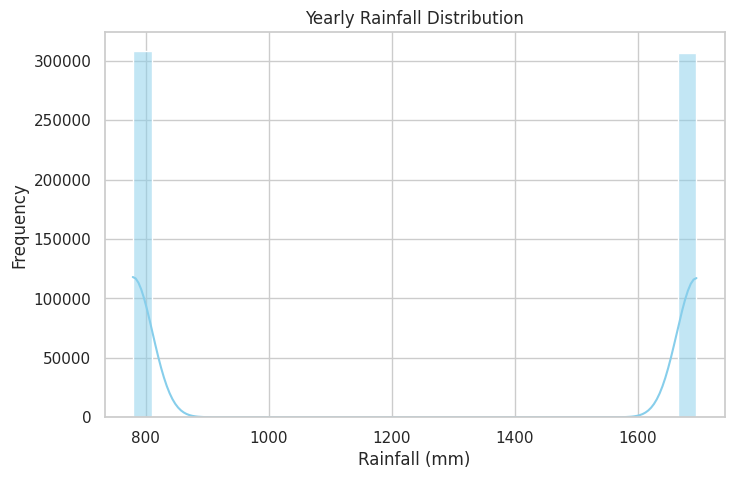

In [ ]:
# Distribution of Rainfall
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged['Rainfall'], bins=30, color='skyblue', kde=True)
plt.title("Yearly Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1935739132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])
/tmp/ipython-input-1935739132.py:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])


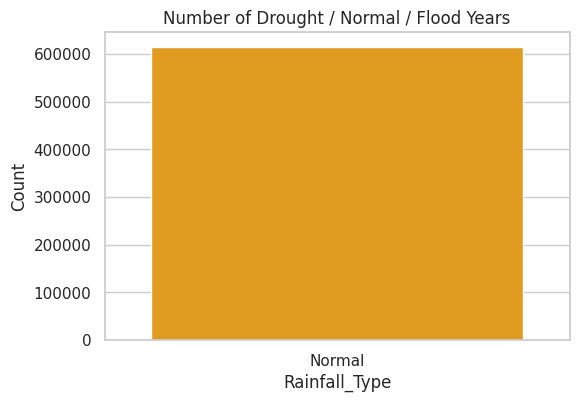

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rainfall_Type', data=merged, palette=['orange','green','red'])
plt.title("Number of Drought / Normal / Flood Years")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


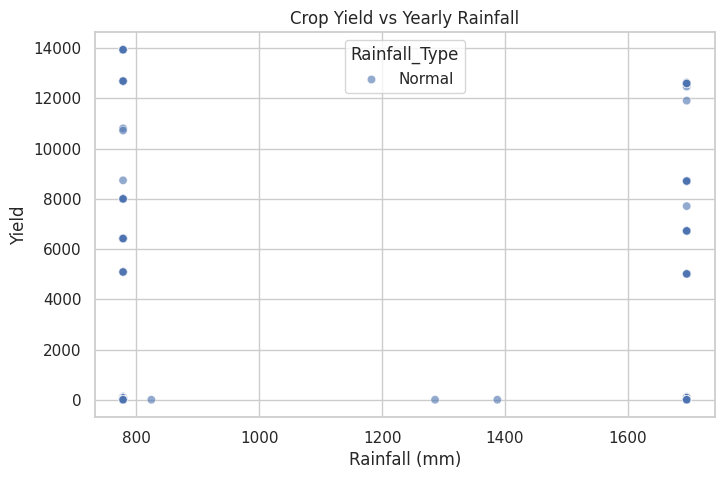

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rainfall', y='Yield', data=merged, hue='Rainfall_Type', alpha=0.6)
plt.title("Crop Yield vs Yearly Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield")
plt.show()

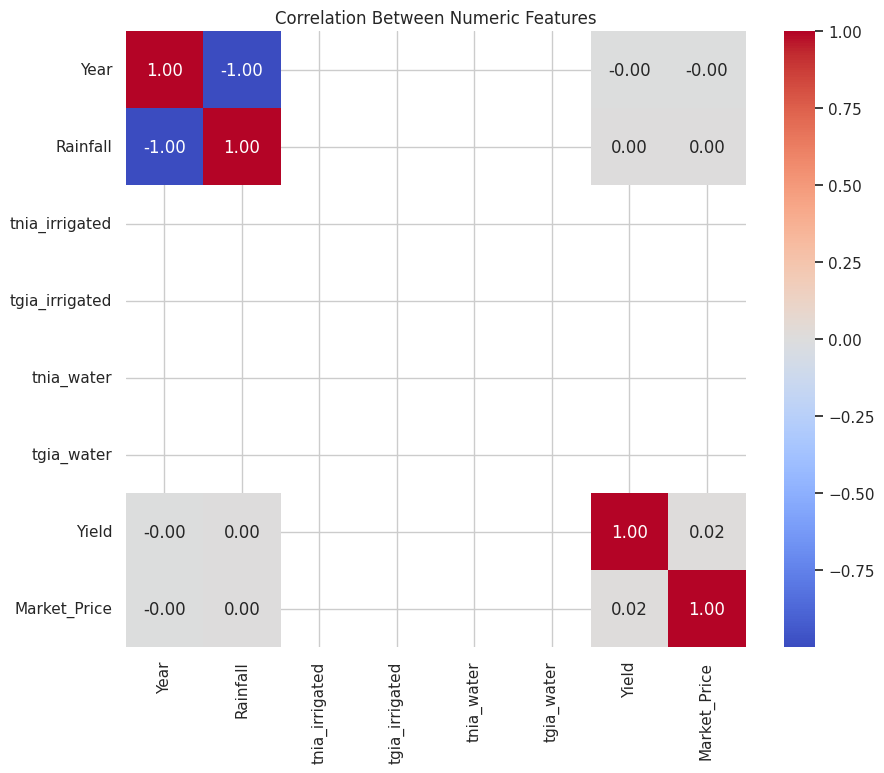

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = merged.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()
